In [1]:
#Importamos las dependecias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
#Archivos con los datos para el enteranmiento
filename = '../resources/breast_cancer_wisconsin.csv'

#Definimos las columnas segun la documentacion UCI
col_names = ['ID', 'Clump_Thickness', 'Uniformity_Cell_Size', 'Uniformity_Cell_Shape', 'Marginal_Adhesion',
             'Single_Epi_Cell_Size', 'Bare_Nuclei', 'Bland_Chromatin', 'Normal_Nucleoli', 'Mitoses', 'Class']

#Leemos el fichero
df = pd.read_csv(filename, names=col_names, thousands=',')

#Eliminamos las filas con datos faltantes
print(f"Tamaño original: '{df.shape}'")
df[df == '?'] = np.nan
df = df.dropna()
print(f"Tamaño sin datos faltantes: ' {df.shape}'")

#Convertimos las columnas como Float para que no las considere categóricas
df['Clump_Thickness'] = df['Clump_Thickness'].astype(float)
df['Uniformity_Cell_Size'] = df['Uniformity_Cell_Size'].astype(float)
df['Uniformity_Cell_Shape'] = df['Uniformity_Cell_Shape'].astype(float)
df['Marginal_Adhesion'] = df['Marginal_Adhesion'].astype(float)
df['Single_Epi_Cell_Size'] = df['Single_Epi_Cell_Size'].astype(float)
df['Bare_Nuclei'] = df['Bare_Nuclei'].astype(float)
df['Bland_Chromatin'] = df['Bland_Chromatin'].astype(float)
df['Normal_Nucleoli'] = df['Normal_Nucleoli'].astype(float)
df['Mitoses'] = df['Mitoses'].astype(float)

#Finalmente, como usamos Pycaret convertimos lo valores 2 y 4 de clasificaión a 0 y 1. Sin esto Pycaret no funciona.
df.loc[df["Class"] == 2, "Class"] = 1
df.loc[df["Class"] == 4, "Class"] = 0

Tamaño original: '(699, 11)'
Tamaño sin datos faltantes: ' (683, 11)'


In [3]:
#Observamos todos los datos:
df.head()

,ID,Clump_Thickness,Uniformity_Cell_Size,Uniformity_Cell_Shape,Marginal_Adhesion,Single_Epi_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
0,1000025,5.0,1.0,1.0,1.0,2.0,1.0,3.0,1.0,1.0,1
1,1002945,5.0,4.0,4.0,5.0,7.0,10.0,3.0,2.0,1.0,1
2,1015425,3.0,1.0,1.0,1.0,2.0,2.0,3.0,1.0,1.0,1
3,1016277,6.0,8.0,8.0,1.0,3.0,4.0,3.0,7.0,1.0,1
4,1017023,4.0,1.0,1.0,3.0,2.0,1.0,3.0,1.0,1.0,1


In [4]:
#Decidimos usar Pycaret ya que nos permite de una manera muy rápida y sencilla comprobar 
#los distintos modelos de entrenamiento.
from pycaret.classification import *

#Ignoramos la columna de ID y indicamos cual es la de clasificación
clf = setup(
    data = df,
    target = 'Class',
    ignore_features = ['ID'])
    
df.head()

,Description,Value
0,session_id,3956
1,Target,Class
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(683, 11)"
5,Missing Values,False
6,Numeric Features,9
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


,ID,Clump_Thickness,Uniformity_Cell_Size,Uniformity_Cell_Shape,Marginal_Adhesion,Single_Epi_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
0,1000025,5.0,1.0,1.0,1.0,2.0,1.0,3.0,1.0,1.0,1
1,1002945,5.0,4.0,4.0,5.0,7.0,10.0,3.0,2.0,1.0,1
2,1015425,3.0,1.0,1.0,1.0,2.0,2.0,3.0,1.0,1.0,1
3,1016277,6.0,8.0,8.0,1.0,3.0,4.0,3.0,7.0,1.0,1
4,1017023,4.0,1.0,1.0,3.0,2.0,1.0,3.0,1.0,1.0,1


In [5]:
#Comparamos los distintos modelos
print(df.head())
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.9687,0.9913,0.9665,0.9879,0.9765,0.9296,0.9324,0.0550
nb,Naive Bayes,0.9603,0.9900,0.9510,0.9911,0.9699,0.9119,0.9164,0.0040
lightgbm,Light Gradient Boosting Machine,0.9603,0.9890,0.9634,0.9792,0.9704,0.9099,0.9137,0.0200
svm,SVM - Linear Kernel,0.9582,0.0000,0.9695,0.9705,0.9697,0.9023,0.9036,0.0110
knn,K Neighbors Classifier,0.9562,0.9852,0.9665,0.9701,0.9675,0.9002,0.9035,0.0080
lr,Logistic Regression,0.9561,0.9917,0.9634,0.9727,0.9673,0.9004,0.9035,0.5510
gbc,Gradient Boosting Classifier,0.9561,0.9876,0.9665,0.9702,0.9676,0.8991,0.9023,0.0240
qda,Quadratic Discriminant Analysis,0.9541,0.9843,0.9420,0.9909,0.9649,0.8987,0.9040,0.0050
ridge,Ridge Classifier,0.9540,0.0000,0.9725,0.9616,0.9666,0.8929,0.8955,0.0050
rf,Random Forest Classifier,0.9540,0.9847,0.9695,0.9648,0.9664,0.8936,0.8974,0.0680


ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                     oob_score=False, random_state=3956, verbose=0,
                     warm_start=False)

        ID  Clump_Thickness  Uniformity_Cell_Size  Uniformity_Cell_Shape  \
0  1000025              5.0                   1.0                    1.0   
1  1002945              5.0                   4.0                    4.0   
2  1015425              3.0                   1.0                    1.0   
3  1016277              6.0                   8.0                    8.0   
4  1017023              4.0                   1.0                    1.0   

   Marginal_Adhesion  Single_Epi_Cell_Size  Bare_Nuclei  Bland_Chromatin  \
0                1.0                   2.0          1.0              3.0   
1                5.0                   7.0         10.0              3.0   
2                1.0                   2.0          2.0              3.0   
3                1.0                   3.0          4.0              3.0   
4                3.0                   2.0          1.0              3.0   

   Normal_Nucleoli  Mitoses  Class  
0              1.0      1.0      1  
1           

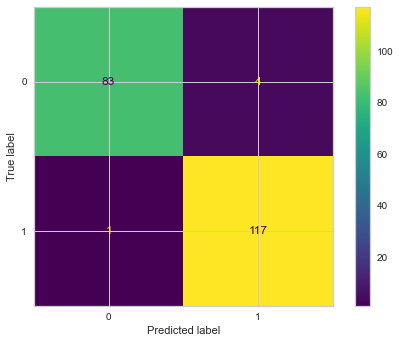

In [6]:
#Observamos que hay muchos modelos con buenos resultados, entre ellos el que vamos a usar que es Regression Logistic.
#Usando Pycaret seria casi automatico pero vamos a ahcerlo usando la libreira de sklearn

from sklearn import model_selection
from sklearn.model_selection import *
from sklearn.metrics import *
from sklearn.utils import *
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import random, time
print(df.head())

#Eliminamos la primera columna (ID porque no la necesitamos)
df = df.iloc[: , 1:]
#Dividimos el DF en X e Y
X = df[df.columns[:-1]]
print(X.head())

y = df['Class']
print(y.head())

#Y lo dividimos en parte de entrenamiento y parte de test, con un 70% - 30%
seed=random.seed(time.time())
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=seed)

#Regresion Logistica - Entrenamos el modelo.
modelo = LogisticRegression()
modelo.fit(X_train, y_train)

#Y obtenemos su puntuación para ver si es buena o no:
y_pred = modelo.predict(X_test)
score = accuracy_score(y_test, y_pred)
print(score)

#Además sacamois la matriz de confusión:
ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred)).plot()

In [7]:
#Ahora vamos a almacenar el sistema entrenado en un archivo para poder utilizarlo ya entrenado en cualquier momento:
import pickle

filename = "../resources/CancerPredictor.pkl"
pickle.dump(modelo, open(filename, "wb"))

In [8]:
#Comprobamos que usando ese fichero con el modelo entrenado efectivamente todo continua funcionando:
loaded_model = pickle.load(open(filename, "rb"))
result = loaded_model.score(X_test, y_test)
print(result)

0.975609756097561


In [9]:
#Testamos un resultado con unos datos aleatorio:
print(loaded_model.predict([[5,1,1,1,2,1,3,1,1]]))
print(loaded_model.predict([[0,0,0,0,0,0,0,0,0]]))
print(loaded_model.predict([[10,10,10,10,10,10,10,10,10]]))

[1]
[1]
[0]
